# **Connecting to Google Drive**

In [21]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# **Importing the necessary Modules**

In [22]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# **Getting the data**

In [23]:
data = pd.read_csv('/content/drive/MyDrive/Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# **preprocessing**

In [24]:
class_counts = data['label'].value_counts()
print("Class distribution before undersampling:")
print(class_counts)

Class distribution before undersampling:
0    20019
1    19981
Name: label, dtype: int64


In [25]:
under_sampler = RandomUnderSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(data.drop('label', axis=1), data['label'])

In [26]:
df = pd.DataFrame(X_resampled, columns=data.columns[:-1])
df['label'] = y_resampled

In [27]:
df.head()

,text,label
0,I went to see this movie with the most positiv...,0
1,"I was not expecting a classic, but at least a ...",0
2,"As a Mystery Science Theatre 3000 fan, I can w...",0
3,"A couple move into their dream home, unaware t...",0
4,Ever wonder why Pacific Islanders seem to auto...,0


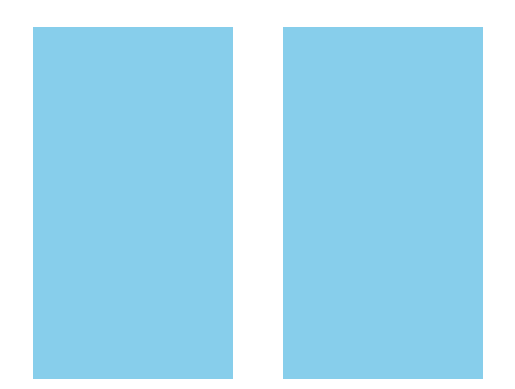

In [28]:
plt.bar(list(set(list(df.label))),list(df.label.value_counts()), color='skyblue')
plt.axis('off')
plt.show()

In [29]:
tokens = ''
for i in list(df.text):
    for j in i:
        if j not in tokens:
            tokens += j

print(tokens)

I wentoshimvpxca.dJqu'r(fg)yH,lMbLNOTGk"ABWS:-jY</>PE3D0RV!45?61298FZ*CK`z;é+U&=7$~Q%_Xóá£í´ë#à{}★ùè ü^öŻ[]úä’êÅåâñ½	\çãïÀ¤@îô°ý¨¾


# COnverting text into **vectors**

In [31]:
nlp = spacy.load('en_core_web_sm')

In [32]:
def preprocess(text):
    L = []
    doc = nlp(text)
    #L = [x.text for x in doc if not x.is_stop or not x.is_punct]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
             L.append(token.text)
    return " ".join(L).lower()


In [33]:
df['preprocessed'] = df.text.apply(lambda x : preprocess(x))

In [34]:
def num_vec(text):
    doc = nlp(text)
    return doc.vector

In [35]:
df['X'] = df.preprocessed.apply(lambda x : num_vec(x))

In [36]:
df.head()

,text,label,preprocessed,X
0,I went to see this movie with the most positiv...,0,went movie positive expectations seen jacquet ...,"[0.18040219, -0.18688156, -0.055014715, 0.0619..."
1,"I was not expecting a classic, but at least a ...",0,expecting classic funny film scenes makes laug...,"[-0.011916071, -0.45923182, -0.08680493, 0.114..."
2,"As a Mystery Science Theatre 3000 fan, I can w...",0,mystery science theatre 3000 fan withstand mot...,"[-0.07585683, -0.29758605, -0.07403976, 0.2032..."
3,"A couple move into their dream home, unaware t...",0,couple dream home unaware neighbours built lan...,"[0.19472545, -0.22533256, 0.050597675, 0.06596..."
4,Ever wonder why Pacific Islanders seem to auto...,0,wonder pacific islanders automatically assume ...,"[0.1080412, -0.30727592, -0.011045225, 0.20556..."


# **Splitting the Data**

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(
    df.X.values,
    df.label,test_size=0.3
)
xtrain

array([array([ 0.10398328, -0.15188166,  0.05347227,  0.12147365, -0.02237156,
              -0.16497171,  0.41451415,  0.16437177,  0.2350851 , -0.4969413 ,
               0.05273545, -0.25588748, -0.3612412 , -0.4716115 , -0.08678254,
               0.4951212 , -0.2967586 , -0.12683795, -0.35043478, -0.06945903,
               0.02885358,  0.6036613 , -0.34779474, -0.07554684,  0.23298179,
              -0.09317896,  0.30469587,  0.5531547 ,  0.35935012, -0.31991953,
               0.10112665, -0.12491658, -0.34474617,  0.0644526 , -0.07984681,
              -0.27959445,  0.24250497,  0.14896263,  0.1904739 , -0.04914473,
              -0.3108107 ,  0.26137063, -0.10258575,  0.3030367 ,  0.3247788 ,
              -0.15803859, -0.2566526 ,  0.16709547, -0.15465279, -0.03172447,
              -0.7266754 ,  0.08210593, -0.2011502 , -0.81320894, -0.7297652 ,
               0.5482854 ,  0.5725946 , -0.00299179, -0.31735358, -0.16081734,
              -0.2962819 , -0.05077583, -0.03427852,

In [38]:
X_train_2d = np.stack(xtrain)
X_test_2d = np.stack(xtest)

# **Decision Tree Classifier**

In [39]:
d_model = DecisionTreeClassifier()

In [40]:
d_model.fit(X_train_2d,ytrain)

DecisionTreeClassifier()

In [41]:
y_pred = d_model.predict(X_test_2d)

In [42]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       611
           1       0.52      0.52      0.52       589

    accuracy                           0.53      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.53      0.53      0.53      1200



# **Knn neighbour classifier**

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(X_train_2d,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = d_model.predict(X_test_2d)

In [46]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       611
           1       0.52      0.52      0.52       589

    accuracy                           0.53      1200
   macro avg       0.52      0.52      0.52      1200
weighted avg       0.53      0.53      0.53      1200



# **Random forest classifier**

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train_2d,ytrain)

RandomForestClassifier()

In [49]:
y_pred = rf.predict(X_test_2d)

In [50]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       611
           1       0.55      0.55      0.55       589

    accuracy                           0.56      1200
   macro avg       0.56      0.56      0.56      1200
weighted avg       0.56      0.56      0.56      1200



# Naive Bayes **Classifer**

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_2d)
X_test = scaler.fit_transform(X_test_2d)

In [52]:
clf = MultinomialNB()
clf.fit(X_train,ytrain)

MultinomialNB()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       611
           1       0.58      0.50      0.53       589

    accuracy                           0.57      1200
   macro avg       0.57      0.57      0.57      1200
weighted avg       0.57      0.57      0.57      1200



I have used dt,rf,knn and naive bayes classifier the maximum accuracy i got is 0.66 which is great. Now i will move forward with deep learning

# **I am going to use lstm**

In [55]:
df.head()

,text,label,preprocessed,X
0,I went to see this movie with the most positiv...,0,went movie positive expectations seen jacquet ...,"[0.18040219, -0.18688156, -0.055014715, 0.0619..."
1,"I was not expecting a classic, but at least a ...",0,expecting classic funny film scenes makes laug...,"[-0.011916071, -0.45923182, -0.08680493, 0.114..."
2,"As a Mystery Science Theatre 3000 fan, I can w...",0,mystery science theatre 3000 fan withstand mot...,"[-0.07585683, -0.29758605, -0.07403976, 0.2032..."
3,"A couple move into their dream home, unaware t...",0,couple dream home unaware neighbours built lan...,"[0.19472545, -0.22533256, 0.050597675, 0.06596..."
4,Ever wonder why Pacific Islanders seem to auto...,0,wonder pacific islanders automatically assume ...,"[0.1080412, -0.30727592, -0.011045225, 0.20556..."


In [86]:
X,y = df.X,df.label
X,y

(0       [0.18040219, -0.18688156, -0.055014715, 0.0619...
 1       [-0.011916071, -0.45923182, -0.08680493, 0.114...
 2       [-0.07585683, -0.29758605, -0.07403976, 0.2032...
 3       [0.19472545, -0.22533256, 0.050597675, 0.06596...
 4       [0.1080412, -0.30727592, -0.011045225, 0.20556...
                               ...                        
 3995    [0.020056482, -0.36188513, 0.05933973, 0.11604...
 3996    [0.048939165, -0.32395875, -0.037611783, 0.148...
 3997    [-0.008206181, -0.51991343, 0.014609692, 0.095...
 3998    [0.0070599387, -0.010561039, -0.11397981, 0.07...
 3999    [0.09903505, -0.4270174, -0.010369744, 0.10976...
 Name: X, Length: 4000, dtype: object,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3995    1
 3996    1
 3997    1
 3998    1
 3999    1
 Name: label, Length: 4000, dtype: int64)

In [87]:
Xtensor,ytensor = torch.tensor(X),torch.tensor(y)
# ytensor = ytensor.reshape(len(ytensor),1)
Xtensor,ytensor

(tensor([[ 0.1804, -0.1869, -0.0550,  ...,  0.8744, -0.1329, -0.0032],
         [-0.0119, -0.4592, -0.0868,  ...,  0.6879, -0.4311,  0.0222],
         [-0.0759, -0.2976, -0.0740,  ...,  0.7314, -0.2418,  0.0721],
         ...,
         [-0.0082, -0.5199,  0.0146,  ...,  0.6967, -0.2561, -0.0604],
         [ 0.0071, -0.0106, -0.1140,  ...,  0.8267, -0.4122, -0.0786],
         [ 0.0990, -0.4270, -0.0104,  ...,  0.6988, -0.1716,  0.0955]]),
 tensor([0, 0, 0,  ..., 1, 1, 1]))

In [88]:
Xtrain,Xtest,ytrain,ytest = Xtensor[:1600],Xtensor[-400:],ytensor[:1600],ytensor[-400:]

In [134]:
Xtrain.shape

torch.Size([1600, 96])

In [89]:
class MovieDataset(Dataset):
    def __init__(self,input,target):
        self.input = input
        self.target = target
    def __len__(self):
        return len(self.input)
    def __getitem__(self,idx):
        x = self.input[idx]
        y = self.target[idx]
        return x,y

In [90]:
Train_data = MovieDataset(input=Xtrain,target=ytrain)
Train_data[0]

(tensor([ 0.1804, -0.1869, -0.0550,  0.0619,  0.0045, -0.2564,  0.3190,  0.2150,
          0.2504, -0.2476, -0.2196, -0.1298, -0.4046, -0.4743, -0.1411,  0.3634,
         -0.1758, -0.2670, -0.5462, -0.1704, -0.0204,  0.7257, -0.4157, -0.0644,
          0.0627, -0.1437,  0.3592,  0.6403,  0.3062,  0.0756,  0.0525, -0.0242,
         -0.3696, -0.0650,  0.1058, -0.3719,  0.2324, -0.0948,  0.0384, -0.1945,
         -0.4198,  0.0667, -0.0780,  0.3011,  0.3005, -0.0081,  0.0437,  0.0131,
         -0.0538,  0.0398, -0.4903,  0.0144, -0.0617, -0.5117, -0.4774,  0.4166,
          0.3606, -0.0181, -0.1403, -0.1786, -0.2418, -0.0324, -0.1717, -0.0102,
          0.0841, -0.1306,  0.1056,  0.1544,  0.2675, -0.1895,  0.6937,  0.2585,
          0.3780, -0.3702,  0.0491, -0.2055,  0.1518, -0.7387,  0.1104, -0.6468,
         -0.1399, -0.1136, -0.1926,  0.1659,  0.1139,  0.0573,  0.1977, -0.1832,
         -0.5060,  0.1087,  0.1357,  0.0199,  0.7173,  0.8744, -0.1329, -0.0032]),
 tensor(0))

In [91]:
Test_data = MovieDataset(input=Xtest,target=ytest)
Test_data[0]

(tensor([-0.0506, -0.5721,  0.1334,  0.2594,  0.0684, -0.3201,  0.1854,  0.4712,
          0.2130, -0.2146,  0.1625,  0.1445, -0.5231, -0.6209, -0.4340,  0.3316,
         -0.2633, -0.1343, -0.5490, -0.3341, -0.3015,  0.4544, -0.4549,  0.0945,
          0.0527, -0.0551,  0.3354,  0.7198,  0.2916,  0.0566, -0.0011, -0.2452,
         -0.2212,  0.3868, -0.1678, -0.2515,  0.3861,  0.1583, -0.1734, -0.1974,
         -0.3886,  0.1525, -0.0562,  0.3572, -0.1108,  0.0379,  0.0850,  0.0998,
         -0.1476,  0.3217, -0.5247,  0.1923,  0.2387, -0.3767, -0.7411,  0.3172,
          0.6200, -0.0051, -0.0054,  0.1583, -0.2644, -0.2217,  0.0548, -0.2909,
         -0.3182, -0.2492,  0.1375,  0.5141,  0.1856, -0.1320,  0.8697,  0.4124,
          0.4222, -0.6744,  0.2257, -0.1356, -0.0962, -0.8719,  0.0288, -0.7268,
         -0.0781, -0.2847, -0.3765,  0.1450, -0.0858, -0.0378,  0.1645, -0.0768,
         -0.7872,  0.5801,  0.1835,  0.1931,  0.9457,  0.6558, -0.0640,  0.0375]),
 tensor(1))

In [92]:
bs = 4
Train_loader = DataLoader(
    Train_data,
    batch_size=bs,
    shuffle=True
)

Test_loader = DataLoader(
    Test_data,
    batch_size=bs,
    shuffle=False
)

In [93]:
data,label = next(iter(Train_loader))
print(data)
print(label)
print(data.shape)

tensor([[-0.1138, -0.3226, -0.0043, -0.0200, -0.0251, -0.0319,  0.2945,  0.3741,
          0.4015, -0.1629,  0.2198, -0.0302, -0.4461, -0.4188, -0.2292,  0.3505,
         -0.4546, -0.3293, -0.2369, -0.1215, -0.1345,  0.2466, -0.2101, -0.1389,
          0.0844, -0.1318,  0.4116,  0.6920,  0.2111,  0.2012, -0.1605, -0.0323,
         -0.3151,  0.0423, -0.0832, -0.0326,  0.3621,  0.0646, -0.1434, -0.0209,
         -0.0781,  0.0028,  0.0546,  0.3611, -0.1874, -0.1549,  0.1318, -0.0441,
         -0.1045,  0.1817, -0.4599,  0.1433,  0.1486, -0.2210, -0.5172,  0.2454,
          0.3495, -0.0480,  0.1633,  0.0091, -0.2375, -0.1429,  0.0065, -0.2078,
         -0.0385, -0.0529, -0.0224,  0.2403,  0.1817, -0.2678,  0.6822,  0.3234,
          0.2647, -0.4102,  0.3522, -0.1431, -0.1175, -0.7108, -0.1076, -0.4116,
         -0.0254, -0.2502, -0.1765, -0.1706,  0.0511,  0.1189,  0.2159, -0.0792,
         -0.6430,  0.5656,  0.2313, -0.0290,  0.7417,  0.5862, -0.2015, -0.0417],
        [ 0.0320, -0.4123, 

# **Lets Create a model architecture**

In [112]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [130]:
class MovieReviewClassification(nn.Module):
    def __init__(self,input_dim,hidden_dim,layer_dim,output_dim):
        super().__init__()
        self.hidden = hidden_dim
        self.layer = layer_dim
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=layer_dim,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim,output_dim)

    def forward(self,x):
        h0 = torch.zeros(self.layer, x.size(0), self.hidden).to(x.device)
        c0 = torch.zeros(self.layer, x.size(0), self.hidden).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Only take the output from the final time step
        out = self.fc(out[:, -1, :])

        return out


In [131]:
input_dim = 96
hidden_dim = 16
layer_dim = 1
output_dim = 2

In [132]:
model = MovieReviewClassification(input_dim,hidden_dim,layer_dim,output_dim).to(device)

Lets predict a raw data

In [135]:
sample = torch.randn(size=(1600, 96))
print(sample)

out = model(sample.to(device))
print(out)

tensor([[ 0.5531,  0.3115,  0.8923,  ...,  2.4662,  0.7656,  0.3161],
        [ 1.5748, -0.8154, -0.9485,  ...,  1.3640,  0.1907,  0.9297],
        [-2.5708,  0.4350,  0.0248,  ..., -1.0645,  2.1799,  1.9993],
        ...,
        [ 0.3945, -0.4717, -0.6140,  ...,  1.0715,  1.3888,  0.0345],
        [-0.1855,  0.9303, -0.2831,  ...,  0.2050,  0.5132, -0.7052],
        [-0.2352, -0.3303,  0.0366,  ..., -0.3030,  0.2096,  0.4391]])


RuntimeError: ignored

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0002)

In [ ]:
def train(
        data,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device,
        model=model
    ):
    model.train()
    train_loss = 0

    for X,y in data:
        optimizer.zero_grad()
        X,y = X.to(device),y.to(device)
        output = model(X)
        loss = loss_fn(output,y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss





In [ ]:
def test_step(
        data,
        model=model,
        loss_fn=loss_fn,
        device=device
    ):
    model.eval()
    test_loss = 0

    for X,y in data:
        X,y = X.to(device),y.to(device)
        output = model(X)
        loss = loss_fn(output,y)
        test_loss += loss.item()
    return test_loss


In [ ]:
epochs = 100

In [ ]:
for epoch in range(epochs):
    train_loss = train(data=Train_loader)
    test_loss = test_step(data=Test_loader)
    print(f'epoch: {epoch} <> train loss: {train_loss} <> test loss: {test_loss}')